# Importing the libraries

In [1]:
#importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the data

In [4]:
df = pd.read_csv('cancer.csv')

In [5]:
df.head()

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 31)

In [7]:
df.groupby('diagnosis(1=m, 0=b)').size()


diagnosis(1=m, 0=b)
0    357
1    212
dtype: int64

In [8]:
# Checking for null values

In [9]:
df.isnull().sum()
df.isna().sum()

diagnosis(1=m, 0=b)        0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
# Data Visualization

diagnosis(1=m, 0=b)
0    [[Axes(0.125,0.777333;0.103333x0.102667), Axes...
1    [[Axes(0.125,0.777333;0.103333x0.102667), Axes...
dtype: object

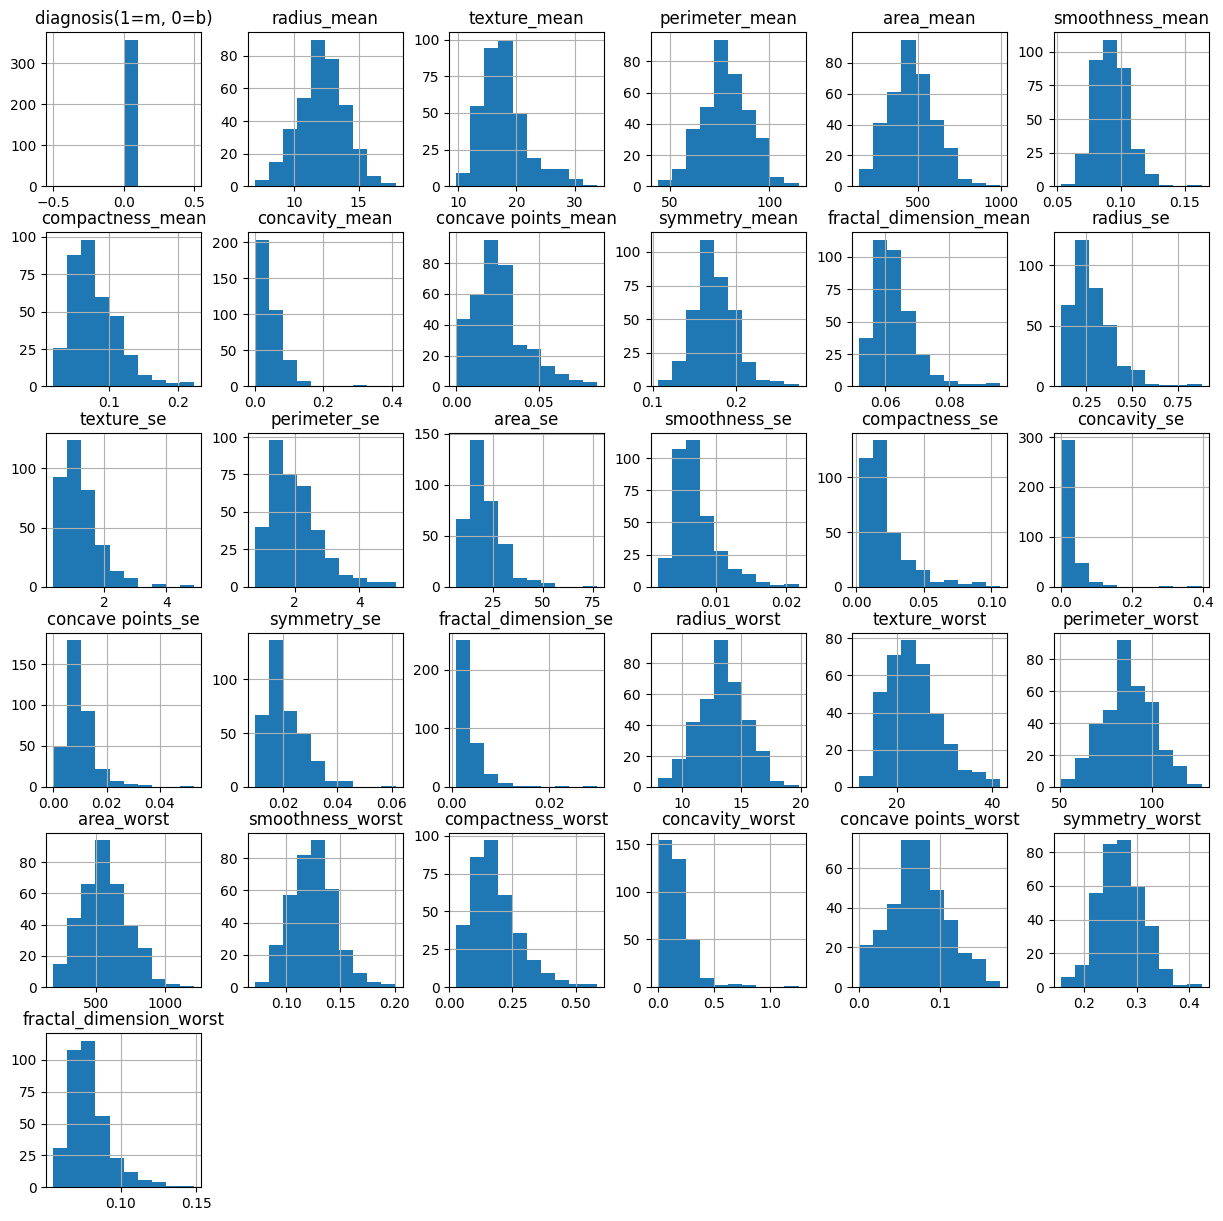

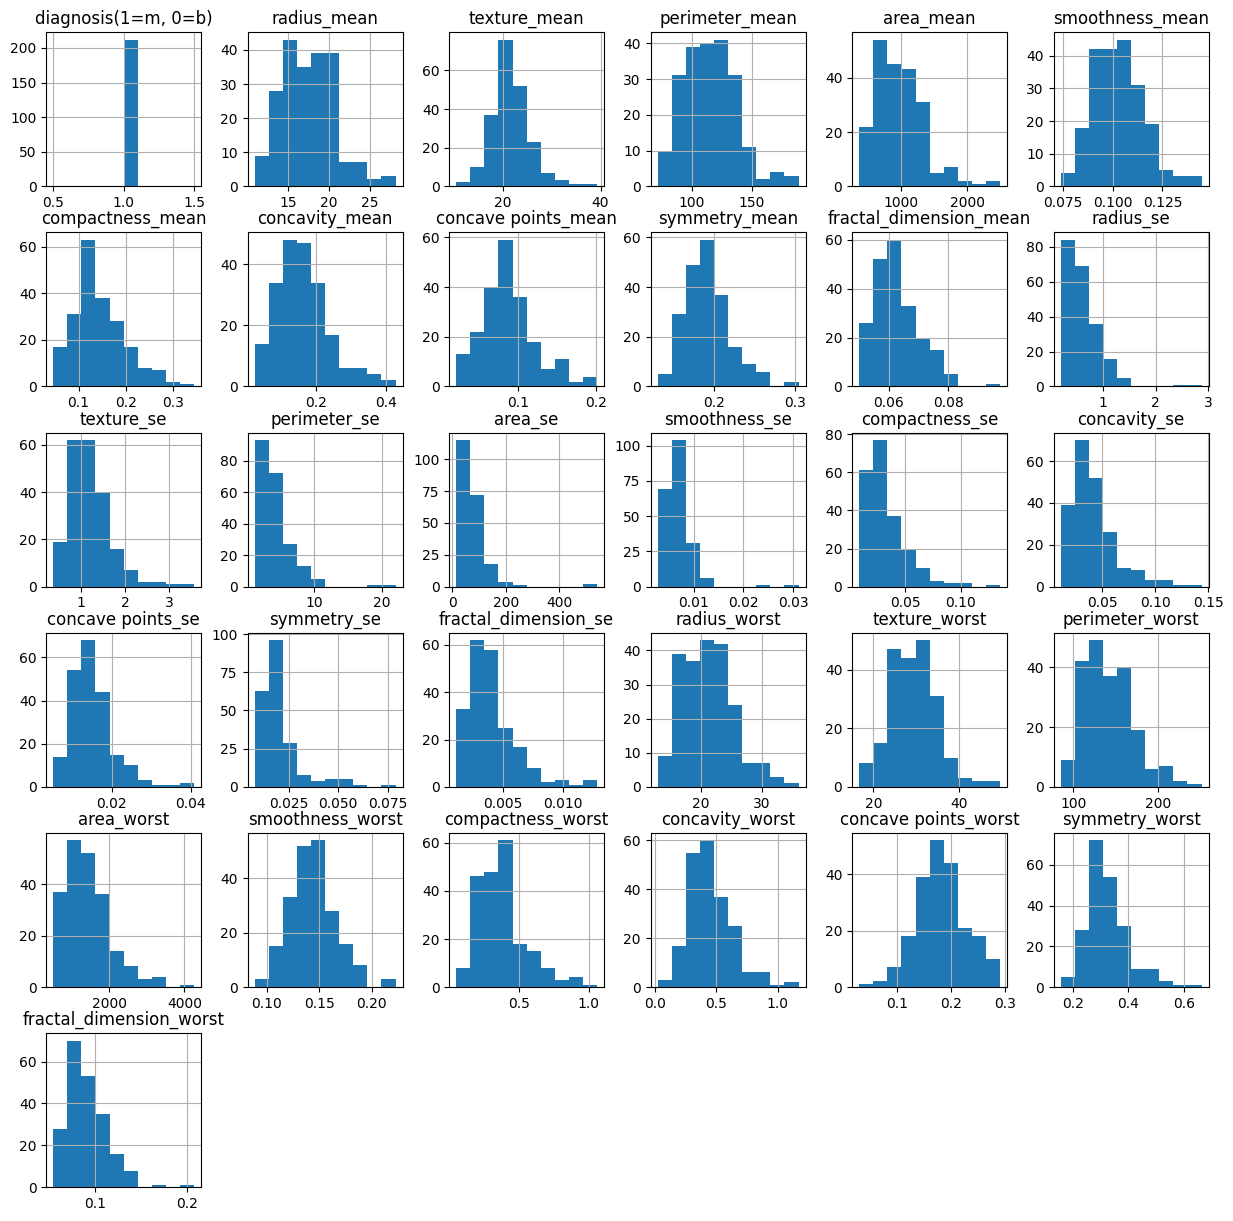

In [11]:
df.groupby('diagnosis(1=m, 0=b)').hist(figsize=(15, 15))

In [12]:
x = df.iloc[:, 1:].values

In [13]:
y = df.iloc[:, 0].values

In [14]:
dataframe = pd.DataFrame(y)

In [15]:
# Data Preprocessing

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# Model Training and Prediction

In [18]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(x_train, y_train)

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_lin.fit(x_train, y_train)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(x_train, y_train)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(x_train, y_train)

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(x_train, y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(x_train, y_train)

#print model accuracy on the training data.
print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

model = [log, knn, svc_lin, svc_rbf, gauss, tree, forest]

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]Logistic Regression Training Accuracy: 0.9371859296482412
[1]K Nearest Neighbor Training Accuracy: 0.9221105527638191
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.964824120603015
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8994974874371859
[4]Gaussian Naive Bayes Training Accuracy: 0.9396984924623115
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9974874371859297


# Model Evaluation

In [19]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(X_test))
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()

[[60 48]
 [32 31]]
Model[0] Testing Accuracy = "0.5321637426900585 !"

[[108   0]
 [ 63   0]]
Model[1] Testing Accuracy = "0.631578947368421 !"

[[108   0]
 [ 61   2]]
Model[2] Testing Accuracy = "0.6432748538011696 !"

[[108   0]
 [ 63   0]]
Model[3] Testing Accuracy = "0.631578947368421 !"

[[  1 107]
 [  0  63]]
Model[4] Testing Accuracy = "0.3742690058479532 !"

[[102   6]
 [  7  56]]
Model[5] Testing Accuracy = "0.9239766081871345 !"

[[106   2]
 [ 51  12]]
Model[6] Testing Accuracy = "0.6900584795321637 !"



As we can see, the score that the classifier said that it is varies greatly from its true scores. However only Decision Tree algorithm has a higher retention of accuracy score even after it decreases. Hence it is the most suitable algorithm for this data set. However bagging and boosting ensemble algorithms may be better if the hyperparameters are tuned rightly.